In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import scipy
import numpy as np
from datascience import *

# Welcome

# 1. Explore their own data
We will start with exploring our data to familiarize ourselves with the data.

In [4]:
Spring2017_file = 'data/vots.csv'
vot_Sp17 = pd.read_csv(Spring2017_file)
vot_Sp17.head()

,language,gender,height,closure,vot,pclo,tclo,kclo,pvot,tvot,kvot
0,English,Female,162.50,0.022967,0.088828,0.022,0.0207,0.0262,0.086985,0.087877,0.091621
1,English,Male,177.00,0.050667,0.054667,0.081,0.0320,0.0390,0.072000,0.049000,0.043000
2,English,Female,170.18,0.070000,0.166667,0.070,0.0700,0.0700,0.150000,0.230000,0.120000
3,English,Male,178.00,0.039667,0.145667,0.034,0.0560,0.0290,0.170000,0.190000,0.077000
4,English,Female,177.80,0.100333,0.154000,0.144,0.0940,0.0630,0.132000,0.153000,0.177000


# 4. Place of Articulation
(a) whether VOT and/or closure vary by place of articulation (p vs. t vs. k)

### 4.1 VOT

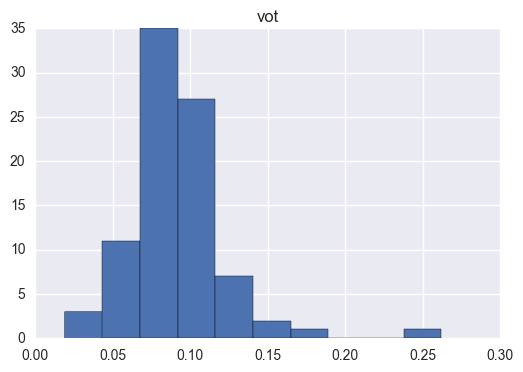

In [142]:
ax = vot_Sp17.hist('vot')

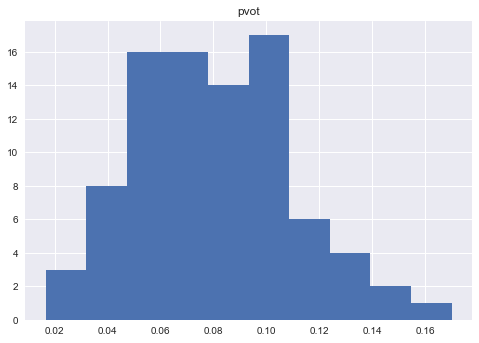

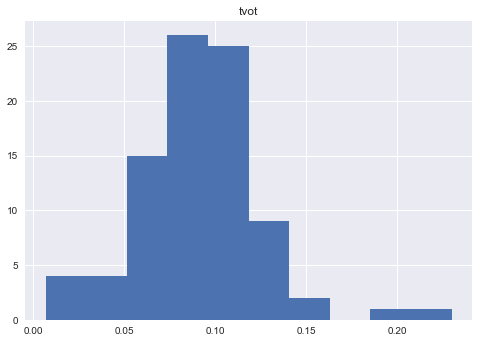

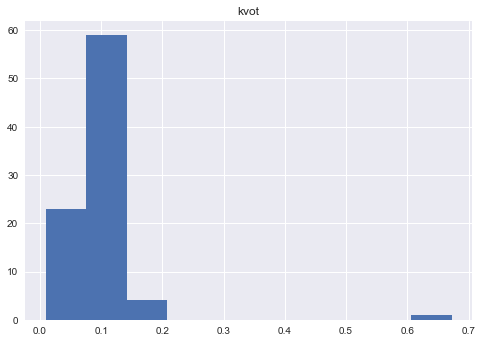

In [77]:
for column in vot_Sp17.columns[8:]:
    vot_Sp17.hist(column)

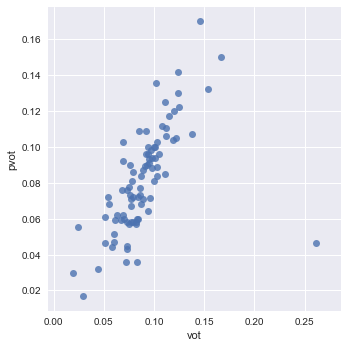

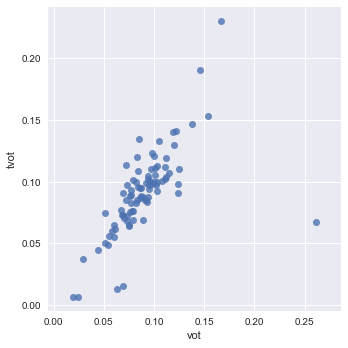

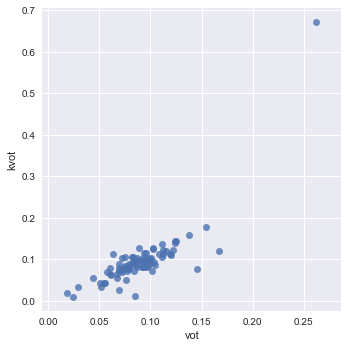

In [83]:
for column in vot_Sp17.columns[8:]:
    sns.lmplot('vot', column, data=vot_Sp17, fit_reg=False)

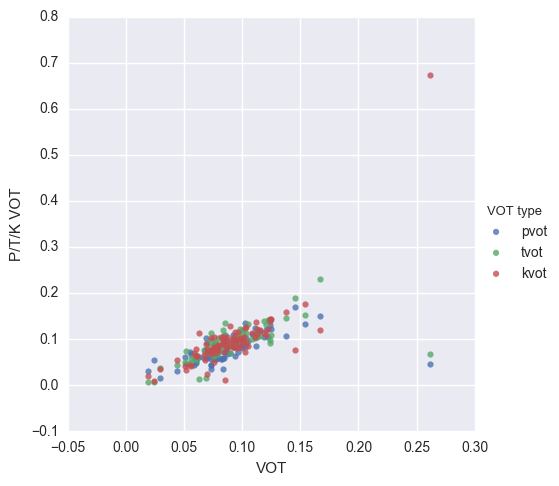

In [12]:
vot_data_3x = vot_Sp17.vot.append(vot_Sp17.vot).append(vot_Sp17.vot)
ptk_vot = vot_Sp17.pvot.append(vot_Sp17.tvot).append(vot_Sp17.kvot)
vot_type = ['pvot'] * 87 + ['tvot'] * 87 + ['kvot'] * 87

v = {'VOT': vot_data_3x, 'P/T/K VOT': ptk_vot, 'VOT type' : vot_type}
vot = pd.DataFrame(data=v)
#vot.head()

ax = sns.lmplot('VOT', 'P/T/K VOT', data=vot, fit_reg=False, hue="VOT type")

### 4.2 Closure

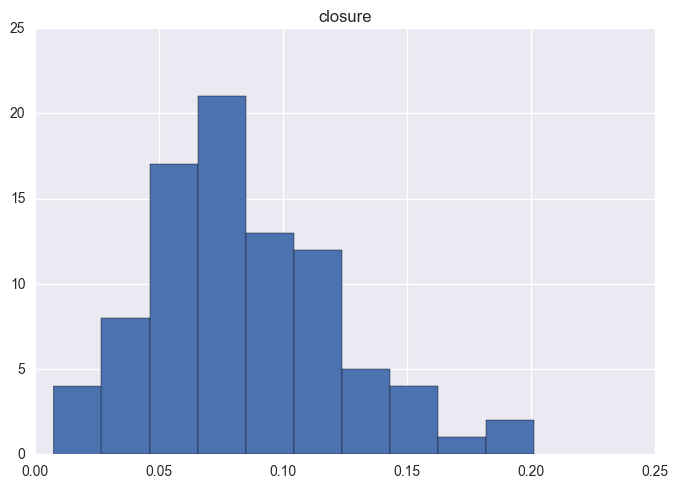

In [14]:
ax = vot_Sp17.hist('closure')

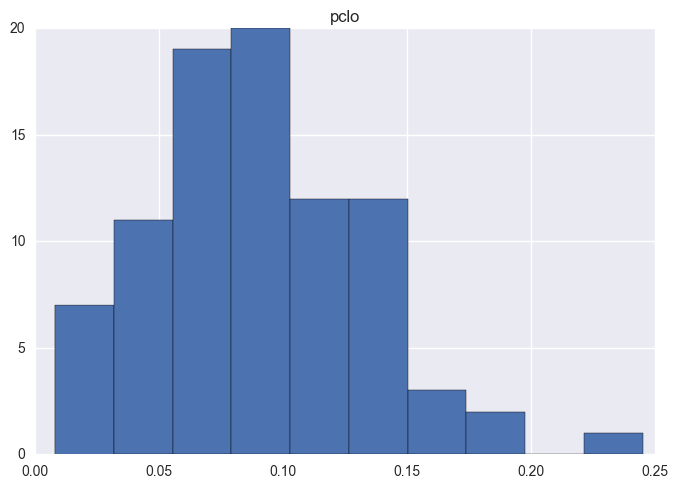

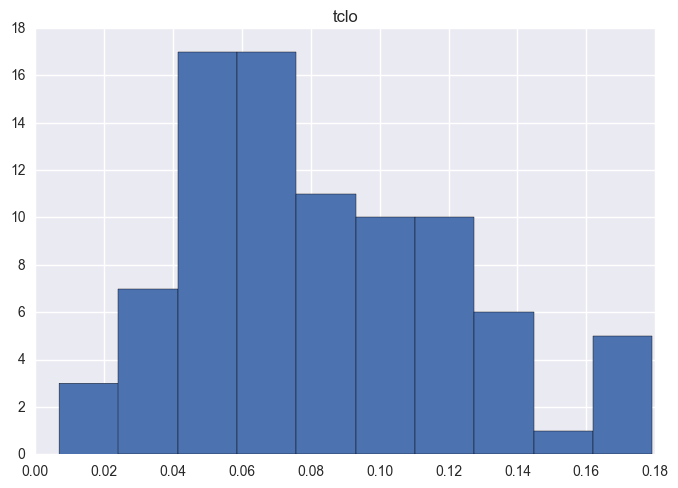

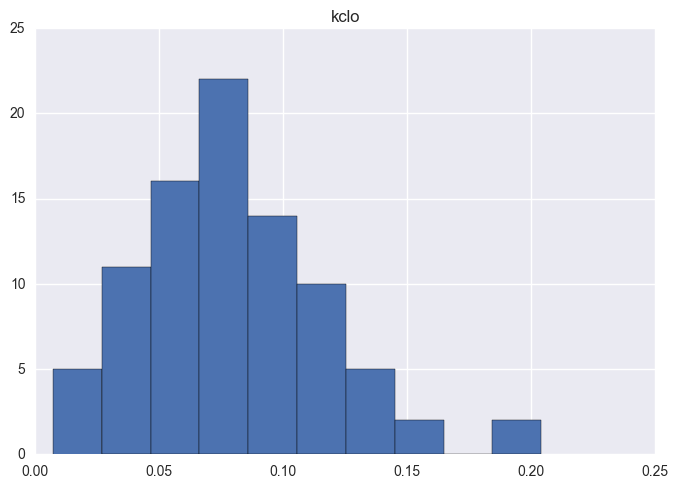

In [16]:
for column in vot_Sp17.columns[5:8]:
    vot_Sp17.hist(column)

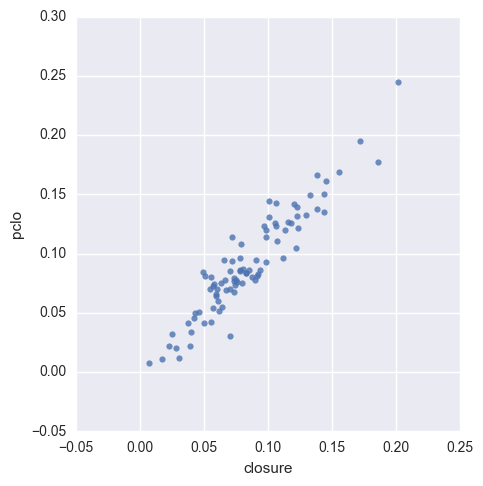

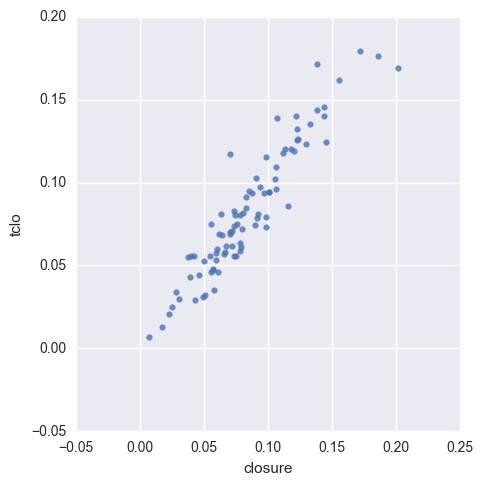

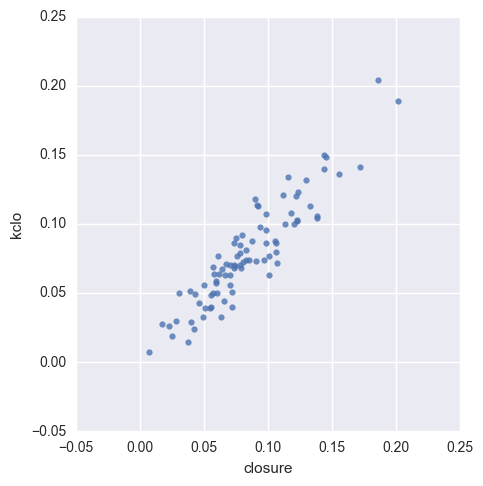

In [19]:
for column in vot_Sp17.columns[5:8]:
    sns.lmplot('closure', column, data=vot_Sp17, fit_reg=False)

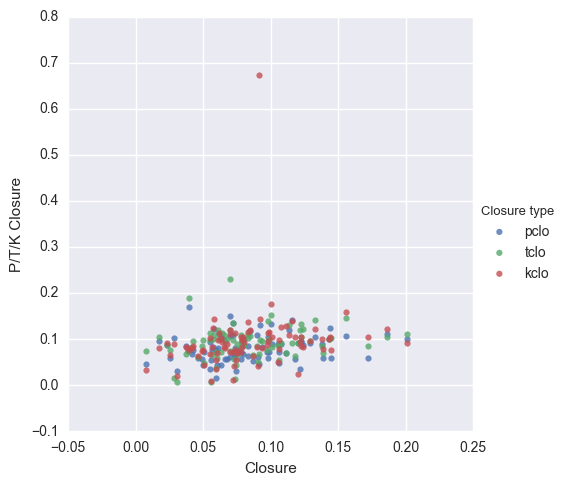

In [17]:
closure_data_3x = vot_Sp17.closure.append(vot_Sp17.closure).append(vot_Sp17.closure)
ptk_closure = vot_Sp17.pclo.append(vot_Sp17.tclo).append(vot_Sp17.kclo)
closure_type = ['pclo'] * 87 + ['tclo'] * 87 + ['kclo'] * 87

c = {'Closure': closure_data_3x, 'P/T/K Closure': ptk_vot, 'Closure type' : closure_type}
closure = pd.DataFrame(data=c)
#closure.head()

ax = sns.lmplot('Closure', 'P/T/K Closure', data=closure, fit_reg=False, hue="Closure type")